In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [68]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [69]:
house_data=pd.read_csv("House_price.csv")

In [70]:
house_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [71]:
house_data.shape

(13320, 9)

In [72]:
house_data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [73]:
drop_columns=['area_type','society','balcony','availability']
house_data_filtered=house_data.drop(columns=drop_columns)

In [74]:
house_data_filtered.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [75]:
house_data_filtered.isnull().sum().sort_values(ascending=True)

total_sqft     0
price          0
location       1
size          16
bath          73
dtype: int64

In [76]:
house_data_filtered['bath'].describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [77]:
house_data_filtered['bath'].fillna(2,inplace=True)

C:\Users\Aditya Pandey\AppData\Local\Temp\ipykernel_18932\1689889235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_data_filtered['bath'].fillna(2,inplace=True)


In [78]:
house_data_filtered.isnull().sum().sort_values(ascending=True)

total_sqft     0
bath           0
price          0
location       1
size          16
dtype: int64

In [79]:
house_data_filtered['location'].describe()

count          13319
unique          1305
top       Whitefield
freq             540
Name: location, dtype: object

In [80]:
house_data_filtered['location'].fillna('Whitefield',inplace=True)

C:\Users\Aditya Pandey\AppData\Local\Temp\ipykernel_18932\2550755792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_data_filtered['location'].fillna('Whitefield',inplace=True)


In [81]:
house_data_filtered.isnull().sum().sort_values(ascending=True)

location       0
total_sqft     0
bath           0
price          0
size          16
dtype: int64

In [82]:
house_data_filtered['size'].describe()

count     13304
unique       31
top       2 BHK
freq       5199
Name: size, dtype: object

In [83]:
house_data_filtered['size'].fillna('2 BHK',inplace=True)

C:\Users\Aditya Pandey\AppData\Local\Temp\ipykernel_18932\885945424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_data_filtered['size'].fillna('2 BHK',inplace=True)


In [84]:
house_data_filtered.isnull().sum().sort_values(ascending=True)

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [85]:
house_data_filtered.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [86]:
house_data_filtered['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [87]:
df=house_data_filtered

In [88]:
df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0]))

In [89]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [90]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [91]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [92]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True  

In [93]:
df[~df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [94]:
def range_to_sqft(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [95]:
range_to_sqft('10-20')

15.0

In [96]:
df2=df.copy()
df2['total_sqft']=df2['total_sqft'].apply(range_to_sqft)

In [97]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [98]:
df3=df2.copy()
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [99]:
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']

In [100]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [101]:
len(df3.location.unique())

1305

In [102]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(location_stats)

location
Whitefield                                            542
Sarjapur  Road                                        399
Electronic City                                       304
Kanakpura Road                                        273
Thanisandra                                           237
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bella

In [103]:
len(location_stats[location_stats<=10])

1053

In [104]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar                                       10
Nagappa Reddy Layout                                  10
Nagadevanahalli                                       10
Dodsworth Layout                                      10
1st Block Koramangala                                 10
Ganga Nagar                                           10
Basapura                                              10
Kalkere                                               10
Gunjur Palya                                          10
Sector 1 HSR Layout                                   10
BTM 1st Stage                                         10
Dairy Circle                                          10
Naganathapura                                         10
Volagerekallahalli                                     9
B Narayanapura                                         9
Chandra Layout                                         9
Chennammana Kere                                       9
Kaverappa Layout      

In [105]:
len(df3.location.unique())

1294

In [106]:
df3.location=df3.location.apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

242

In [107]:
df3.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [108]:
df3[df3.total_sqft/df3.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [109]:
df3.shape

(13320, 7)

In [110]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]
df4.shape

(12576, 7)

In [111]:
def remove_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out    

In [112]:
df5=remove_outlier(df4)
df5.shape

(10301, 7)

In [113]:
def scatter_plot(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

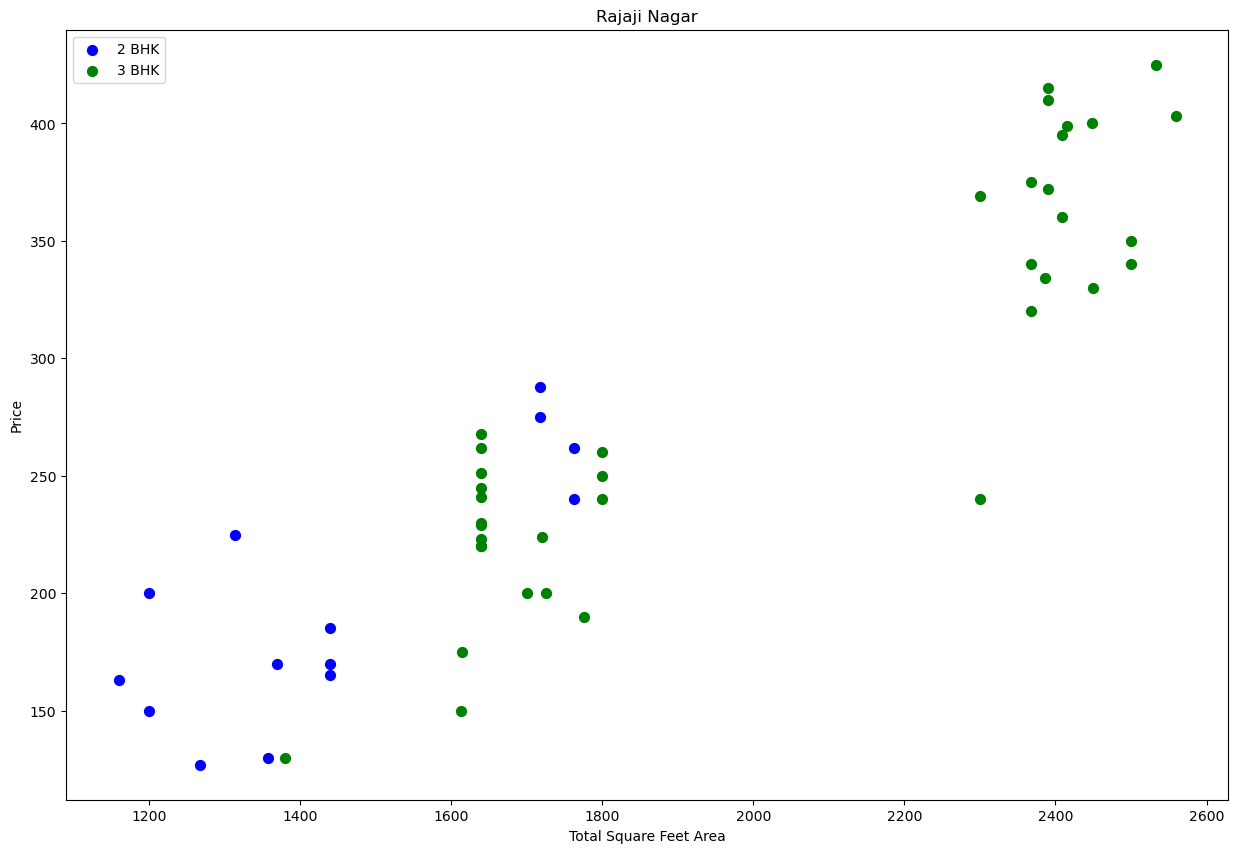

In [114]:
scatter_plot(df5,'Rajaji Nagar')

In [115]:
# def remove_bhk_outliers(df):
#     exclude_indices=np.array([])
#     for location,location_df in df.groupby('location'):
#         bhk_stats={}
#         for bhk,bhk_df in location_df.groupby('bhk'):
#             bhk_stats={
#                 'mean': np.mean(bhk_df.price_per_sqft),
#                 'std': np.std(bhk_df.price_per_sqft),
#                 'count': bhk_df.shape[0]
#             }
#         for bhk,bhk_df in location_df.groupby('bhk'):
#             stats=bhk_stats.get(bhk-1)
#             if stats and stats['count']>5:
#                 exclude_indices =np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
#     return df.drop(exclude_indices, axis='index')

def remove_bhk_outliers(df):
    exclude_indices = []
    
    # Group by 'location'
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        # First loop: calculate and store stats for each BHK type
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        # Second loop: find outliers based on stats of (bhk - 1)
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)  # Get stats for smaller BHK (bhk-1)
            if stats and stats['count'] > 5:  # Only consider if there are enough data points
                # Find indices of rows where price per sqft is lower than the mean of smaller BHK
                exclude_indices.extend(bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    
    # Drop the outliers based on the calculated indices
    return df.drop(exclude_indices, axis='index')


In [116]:
df5.shape

(10301, 7)

In [117]:
df6=remove_bhk_outliers(df5)
df6.shape

(7361, 7)

In [118]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5313,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5962,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6051,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6784,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
7116,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [119]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5887,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9064,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [120]:
df7=df6[df6.bath<df6.bhk+2]
df7.shape

(7282, 7)

In [121]:
df8=df7.drop(['size','price_per_sqft'],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [122]:
dummies = pd.get_dummies(df8.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Other,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [123]:
df9=pd.concat([df8,dummies],axis='columns')

In [124]:
df9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Other,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [125]:
df10=df9.drop('location',axis='columns')
df10.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Other,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [126]:
df10.shape

(7282, 246)

In [127]:
x=df10.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Other,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [128]:
y=df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [130]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.879764695758341

In [133]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)

cross_val_score(LinearRegression(), x,y,cv=cv)

array([0.81679226, 0.87754824, 0.80575509, 0.83952689, 0.85971123])

In [140]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion': ['squared_error', 'absolute_error'],  # Example parameter grid
                'max_depth': [5, 10, 15]
}
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name , config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
        'model':algo_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.845987,{'fit_intercept': False}
1,lasso,0.702298,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.767287,"{'criterion': 'squared_error', 'max_depth': 15}"


In [147]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [148]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]

    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index >=0:
        X[loc_index]=1

    return lr_clf.predict([X])[0]

In [149]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\Aditya Pandey\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.90226540823994

In [150]:
predict_price('1st Phase JP Nagar',1000,3,3)

C:\Users\Aditya Pandey\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.65378878072642

In [152]:
import pickle


In [153]:
with open('property_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [154]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))